<a href="https://colab.research.google.com/github/NicolasToncheis/Manufatura/blob/main/RedutorDeVelocidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Propriedades do enunciado: Grupo 9
Red = 6 #Redução requerida
Ts = 1500*8.8507 #Lbf.in, na saída do redutor
Rot = 1800 #Rpm, na entrada do redutor, no Par de Engrenagens 1

#Propriedades do engrenamento:
AP = 20*(np.pi/180) #Ângulo de pressão em radianos
N = math.sqrt(Red) #Redução por cada par
AH = 30*(np.pi/180) #Ângulo de hélice em radianos
#Por análise conforme Norton 12-2:
Np = 18 #Número de dentes no pinhão
Ng = 44 #Número de dentes na engrenagem
pd = 8 #Dentes/in
dpp = Np/pd #Diâmetro primitivo dos pinhões em in
dpg = Ng/pd #Diâmetro primitivo das engrenagens em in
#Análise de tensões do engrenamento: Elencamento de índices
Qv = 6 #Índice de qualidade das engrenagens AGMA
F1 = 2 #Largura de face em in do Par de Engrenagens 1
F2 = 3.5 #Largura de face em in do Par de Engrenagens 2
B = ((12 - Qv)**(2/3))/4 #Coeficiente B para a qualidade fornecida
A = 50 + 56*(1 - B) #Coeficiente A
Vt1 = 2*np.pi*Rot*(dpp/24) #Velocidade tangencial do Par de Engrenagens 1 em ft/min
Kv1 = (A/(A + math.sqrt(Vt1)))**B #Fator dinâmico com velocidade do Par de Engrenagens 1
Rot2 = Vt1/(2*np.pi*(dpg/24)) #Determinação da velocidade angular do Par de Engrenagens 2 em Rpm
Vt2 = 2*np.pi*(Rot2)*(dpp/24) #Velocidade tangencial do Par de Engrenagens 2 em ft/min
Kv2 = (A/(A + math.sqrt(Vt2)))**B #Fator dinâmico com velocidade do Par de Engrenagens 2
Km = 1.6 #Fator de distribuição de carga
Ka = 1 #Fator de aplicação uniforme
Ks = 1 #Valor padronizado para Fator de tamanho
Kb = 1 #Fator de espessura de borda para disco sólido
Kt = 1 #Fator de ciclo de carga para pinhões e engrenagens
#Por interpolação linear do intervalo estabelecido, pela Tabela 13-3 de Norton, encontra-se:
Jp = 0.4375 #Fator geométrico de flexão para pinhões de 18 dentes
Jg = 0.4835 #Fator geométrico de flexão para engrenagens de 44 dentes
#Análise de Forças nas engrenagens dos eixos:
Tc = Ts/N #No Eixo Central
Te = Tc/N #No Eixo de Entrada
#Para o Pinhão 1 no Eixo de Entrada:
WtP1 = Te/(dpp/2) #Força tangencial em Lbf
WrP1 = WtP1*math.tan(AP) #Força radial em Lbf
WaP1 = WtP1*math.tan(AH) #Força axial em Lbf
#Para a Engrenagem 1 no Eixo Central:
WtG1 = WtP1 #Força tangencial transmitida pelo Par 1
WrG1 = WrP1 #Força radial transmitida pelo Par 1
WaG1 = WaP1 #Força axial transmitida pelo Par 1
#Para o Pinhão 2 no Eixo Central:
#T2 = (dpg/2)*WtG1 = Tc em Lbf.in: correção do código da primeira entrega, com valores trocados de raio
WtP2 = Tc/(dpp/2) #Força tangencial em Lbf
WrP2 = WtP2*math.tan(AP) #Força radial em Lbf
WaP2 = WtP2*math.tan(AH) #Força axial em Lbf
#Para a Engrenagem 2 no Eixo de Saída:
WtG2 = WtP2 #Força tangencial transmitida pelo Par 2
WrG2 = WrP2 #Força radial transmitida pelo Par 2
WaG2 = WaP2 #Força axial transmitida pelo Par 2
#Prova real: T3 = (dpg/2)*WtG2 #= Ts em Lbf.in.
#Análise de Tensões de flexão nas engrenagens:
SigmaBP1 = (WtP1*pd*Ka*Km*Ks*Kb*Kt)/(F1*Jp*Kv1) #Em psi
SigmaBG1 = (WtG1*pd*Ka*Km*Ks*Kb*Kt)/(F1*Jg*Kv1) #Em psi
SigmaBP2 = (WtP2*pd*Ka*Km*Ks*Kb*Kt)/(F2*Jp*Kv2) #Em psi
SigmaBG2 = (WtG2*pd*Ka*Km*Ks*Kb*Kt)/(F2*Jg*Kv2) #Em psi
#Análise das resistências à fadiga de flexão pela AGMA: Tabela 12-25 de Norton
#Material dos pinhões: aço 1045 temperado para obter dureza de 500 Hb. Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d539dceea38c44ef982a90735e80d348
HBp = 500 #Em HB
SbfLinhaP = 6235 + 174*HBp - 0.126*(HBp**2) #Em psi
#Material das engrenagens: aço 4320 da empresa Ovako (20NiCrMo7 157C). Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=2ed2280bc0224545bd0694635ced1e04
HBg = 360 #Em HB
SbfLinhaG = 6235 + 174*HBg - 0.126*(HBg**2) #Em psi
N1 = Rot*60*10*261*8 #Número de ciclos em vida para 8 anos do Par de Engrenagens 1
N2 = Rot2*60*10*261*8 #Número de ciclos em vida para 8 anos do Par de Engrenagens 2
Kl1 = 1.3558*(N1**-0.0178) #Fator de vida pro Par de Engrenagens 1
Kl2 = 1.3558*(N2**-0.0178) #Fator de vida pro Par de Engrenagens 2
Kt = 1 #Fator de temperatura para aplicações abaixo de 121°C
Kr = 1 #Fator de Confiabilidade das Engrenagens, assumida como 99%
SbfP1 = Kl1*SbfLinhaP/(Kt*Kr) #Tensão por flexão AGMA corrigida do Pinhão 1
SbfG1 = Kl1*SbfLinhaG/(Kt*Kr) #Tensão por flexão AGMA corrigida da Engrenagem 1
SbfP2 = Kl2*SbfLinhaP/(Kt*Kr) #Tensão por flexão AGMA corrigida do Pinhão 2
SbfG2 = Kl2*SbfLinhaG/(Kt*Kr) #Tensão por flexão AGMA corrigida da Engrenagem 2
#Verficação dos coeficientes de segurança por tensão de flexão:
NfP1 = SbfP1/SigmaBP1 #Coeficiente de tensão por flexão para Pinhão 1
NfG1 = SbfG1/SigmaBG1 #Coeficiente de tensão por flexão para Engrenagem 1
NfP2 = SbfP2/SigmaBP2 #Coeficiente de tensão por flexão para Pinhão 2
NfG2 = SbfG2/SigmaBG2 #Coeficiente de tensão por flexão para Engrenagem 2
#Análise das tensões superficiais nas engrenagens:
Ca = Ka #Coeficiente de aplicação
Cm = Km #Coeficiente de distribuição
Cv1 = Kv1 #Coeficiente de velocidade do Par de Engrenagens 1
Cv2 = Kv2 #Coeficiente de velocidade do Par de Engrenagens 2
Cs = Ks #Coeficiente de tamanho
Cf = 1 #Engrenagens por usinagem
#Os coeficientes de Poisson são divergentes:
vp = 0.29 #Coeficiente de Poisson dos pinhões
vg = 0.3 #Coeficiente de Poisson das engernagens
#Poré, o módulo de elasticidade diverge um pouco também:
Ep = 29700000 #Módulo de elasticidade em psi dos pinhões
Eg = 29900000 #Módulo de elasticidade em psi das engenagens
Cpi = (1/(2*np.pi*((1 - vp**2)/Ep)))**0.5 #Coeficiente elástico dos pinhões
Cgn = (1/(2*np.pi*((1 - vg**2)/Eg)))**0.5 #Coeficiente elástico das engrenagens
a = 1/pd #Adendo em in
Cpg = (dpp + dpg)/2 #Distância dos pares de engrenamento em in
Zpg = math.sqrt(((dpp/2)+a)**2 - ((dpp/2)*math.cos(AP))**2) + math.sqrt(((dpg/2)+a)**2 - ((dpg/2)*math.cos(AP))**2) - Cpg*math.sin(AP) #Comprimento de ação
mpPG = (pd*Zpg)/(np.pi*math.cos(AP)) #Razão de contato transversal
nrPG = mpPG - 1 #Comprimento mínimo de linhas pela razão de contato transversal
mF1 = (F1*pd*math.tan(AH))/np.pi #Razão de contato axial do Par de Engrenagens 1
mF2 = (F2*pd*math.tan(AH))/np.pi #Razão de contato axial do Par de Engrenagens 2
na1 = mF1 - 2 #Comprimento mínimo de linhas pela razão de contato axial do Par de Engrenagens 1
na2 = mF2 - 5 #Comprimento mínimo de linhas pela razão de contato axial do Par de Engrenagens 1
px = (np.pi*math.cos(AH))/(pd*math.sin(AH)) #Passo axial, também dado por px = F/mF
APN = math.atan(math.cos(AH)*math.tan(AP)) #Ângulo de pressão normal, dado em radianos
AHB = math.acos(math.cos(AH)*(math.cos(APN)/math.cos(AP))) #Ângulo de hélice da base, dado em radianos
Lmin1 = (mpPG*F1 - (1-nrPG)*(1-na1)*px)/math.cos(AHB) #Comprimento mínimo do par Pinhão-Engrenagem 1, em in
Lmin2 = (mpPG*F2 - (1-nrPG)*(1-na2)*px)/math.cos(AHB) #Comprimento mínimo do par Pinhão-Engrenagem 2, em in
mNpg1 = F1/Lmin1 #Razão de compartilhamento de carga do par Pinhão-Engrenagem 1, em in
mNpg2 = F2/Lmin2 #Razão de compartilhamento de carga do par Pinhão-Engrenagem 2, em in
#Continua-se a análise de tensões superficiais como visto na aula 20 e 26:
RoP = math.sqrt((0.5*(((dpp/2)+a)+(Cpg-(dpg/2)-a)))**2 - (dpp*math.cos(AP)/2)) #Raio de curvatura dos pinhões, dado em in
RoG = Cpg*math.sin(AP) - RoP #Raio de curvatura das engrenagens, dado em in
Ipg1 = math.cos(AP)/(((1/RoP)+(1/RoG))*dpp*mNpg1) #Fator geométrico I para o Par de Engrenagens 1
Ipg2 = math.cos(AP)/(((1/RoP)+(1/RoG))*dpp*mNpg2) #Fator geométrico I para o Par de Engrenagens 2
SigmaCP1 = Cpi*math.sqrt((WtP1*Ca*Cm*Cs*Cf)/(F1*Ipg1*dpp*Cv1)) #Tensão superficial do Pinhão 1, dado em psi
SigmaCG1 = Cgn*math.sqrt((WtG1*Ca*Cm*Cs*Cf)/(F1*Ipg1*dpg*Cv1)) #Tensão superficial da Engrenagem 1, dado em psi
SigmaCP2 = Cpi*math.sqrt((WtP2*Ca*Cm*Cs*Cf)/(F2*Ipg2*dpp*Cv2)) #Tensão superficial do Pinhão 2, dado em psi
SigmaCG2 = Cgn*math.sqrt((WtG2*Ca*Cm*Cs*Cf)/(F2*Ipg2*dpg*Cv2)) #Tensão superficial da Engrenagem 2, dado em psi
#Pelas durezas já estabelecidas, retira-se da Tabela 12-27
SfcLinhaP = 27000 + 364*HBp #Resistência à faidga de sueprfície AGMA para pinhões, dado em psi
SfcLinhaG = 27000 + 364*HBg #Resistência à faidga de sueprfície AGMA para engrenagens, dado em psi
Cl1 = Kl1 #Coeficiente de vida para o Par de Engrenagens 1
Cl2 = Kl2 #Coeficiente de vida para o Par de Engrenagens 2
Ch = 1 #Coeficiente de fabricação
Cr = Kr #Coeficiente de confiabilidade
Ct = Kt #Coeficiente de temperatura
SfcP1 = Cl1*Ch*SfcLinhaP/(Ct*Cr) #Resistência à fadiga superficial corrigida para o Pinhão 1
SfcG1 = Cl1*Ch*SfcLinhaG/(Ct*Cr) #Resistência à fadiga superficial corrigida para a Engrenagem 1
SfcP2 = Cl2*Ch*SfcLinhaP/(Ct*Cr) #Resistência à fadiga superficial corrigida para o Pinhão 2
SfcG2 = Cl2*Ch*SfcLinhaG/(Ct*Cr) #Resistência à fadiga superficial corrigida para a Engrenagem 2
#Cálculo dos coeficientes de segurança par a situação de fadiga em superfície para cada engrenagem
NcP1 = (SfcP1/SigmaCP1)**2 #Coeficiente de tensão por fadiga superficial para Pinhão 1
NcG1 = (SfcG1/SigmaCG1)**2 #Coeficiente de tensão por fadiga superficial para Engrenagem 1
NcP2 = (SfcP2/SigmaCP2)**2 #Coeficiente de tensão por fadiga superficial para Pinhão 2
NcG2 = (SfcG2/SigmaCG2)**2 #Coeficiente de tensão por fadiga superficial para Engrenagem 2
print(RoP, RoG, na1, na2, nrPG)
print(NfP1, NfG1, NfP2, NfG2)
print(NcP1, NcG1, NcP2, NcG2)
print(WtP1, WrP1, WaP1, WtG1, WrG1, WaG1, WtP2, WrP2, WaP2, WtG2, WrG2, WaG2)

0.45658602871293924 0.8687420266740269 0.9404207755828908 0.1457363572700583 0.6307300259238207
1.3847525228963702 1.3025482990098447 1.124539565890523 1.057782581725318
1.6661388514011042 2.298324925047254 1.3291665736469793 1.8334946473300178
1966.8222222222223 715.8647449821949 1135.5453394481378 1966.8222222222223 715.8647449821949 1135.5453394481378 4817.71085921135 1753.503350053982 2781.506661443456 4817.71085921135 1753.503350053982 2781.506661443456


Análise de Forças - refeitura

In [ ]:
#Valores estabelecidos:
L1 = 6 #Em in
L2 = 14 #Em in
L3 = 2 #Em in
#Parte-se para a análise de forças, corrigindo os sinais:
#Análise dos mancais A e B:
FtP1 = WtP1 #Força tangencial do Pinhão 1 positiva
FrP1 = -WrP1 #Força radial do Pinhão 1 negativa
FaP1 = WaP1 #Força axial do Pinhão 1 positiva
Ay = ((L1/(L1+L2))-1)*WtP1 #Reação na direção y do Mancal A, em Lbf
By = -(L1/(L1+L2))*WtP1 #Reação na direção y do Mancal B, em Lbf
Az = (1-(L1/(L1+L2)))*WrP1 #Reação na direção z do Mancal A, em Lbf
Bz = (L1/(L1+L2))*WrP1 #Reação na direção z do Mancal B, em Lbf
Ax = 0
Bx = -FaP1
print(Ax,FaP1,Bx)
print(Ay,FtP1,By)
print(Az,FrP1,Bz)
#Reação nos mancais C e D:
FtG1 = -WtG1 #Força tangencial da Engrenagem 1 negativa
FrG1 = WrG1 #Força radial da Engrenagem 1 positiva
FaG1 = -WaG1 #Força axial da Engrenagem 1 negativa
FtP2 = WtP2 #Força tangencial do Pinhão 2 positiva
FrP2 = -WrP2 #Força radial do Pinhão 2 negativa
FaP2 = WaP2 #Força axial do Pinhão 2 positiva
Dy = ((L1+L2-L3)*-WtP2 + L1*WtG1)/(L1+L2)
Dz = ((L1+L2-L3)*WrP2 - L1*WrG1)/(L1+L2)
Cx = 0
Cy = WtG1 - WtP2 - Dy
Cz = -WrG1 + WrP2 - Dz
Dx = -(FaG1 + FaP2)
print(Cx,FaG1,FaP2,Dx)
print(Cy,FtG1,FtP2,Dy)
print(Cz,FrG1,FrP2,Dz)
#Reação nos mancais E e F:
FtG2 = -WtG2 #Força tangencial da Engrenagem 2 negativa
FrG2 = WrG2 #Força radial da Engrenagem 2 positiva
FaG2 = -WaG2  #Força axial da Engrenagem 2 negativa
Fy = ((L1+L2-L3)*WtG2)/(L1+L2)
Fz = -((L1+L2-L3)*WrG2)/(L1+L2)
Ey = -Fy + WtG2
Ez = -(Fz + WrG2)
Ex = -FaG2
Fx = 0
print(Ex,FaG2,Fx)
print(Ey,FtG2,Fy)
print(Ez,FrG2,Fz)

0 1135.5453394481378 -1135.5453394481378
-1376.7755555555555 1966.8222222222223 -590.0466666666666
501.1053214875364 -715.8647449821949 214.75942349465848
0 -1135.5453394481378 2781.506661443456 -1645.961321995318
895.0044696344203 -1966.8222222222223 4817.71085921135 -3745.893106623548
-325.7549864821383 715.8647449821949 -1753.503350053982 1363.3935915539255
2781.506661443456 -2781.506661443456 0
481.7710859211347 -4817.71085921135 4335.939773290215
-175.35033500539816 1753.503350053982 -1578.153015048584


Gráficos de esforços recalculados

Text(0, 0.5, 'Força cortante (Lbf)')

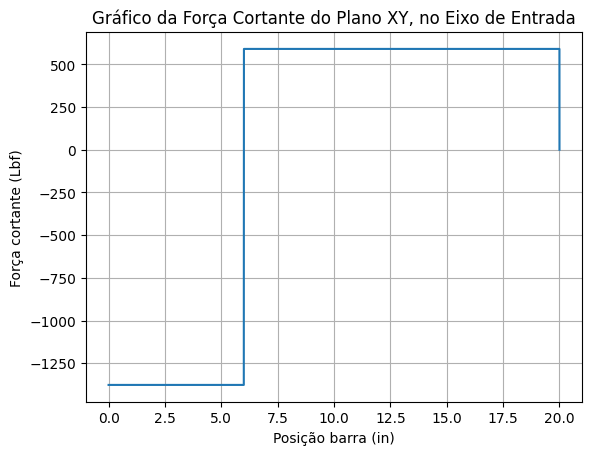

In [ ]:
z = L1
Eixo = L1+L2
b = L1+L2-L3
x = np.linspace(0,Eixo,10001)
Vxy1 = Ay*np.heaviside(x-0,1)*(x-0)**0 +FtP1*np.heaviside(x-z,1)*(x-z)**0 +By*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxy1)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XY, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

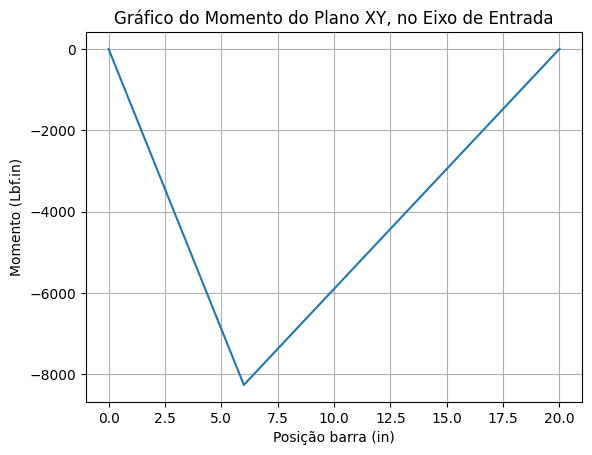

In [ ]:
Mxy1 = Ay*np.heaviside(x-0,1)*(x-0)**1 +FtP1*np.heaviside(x-z,1)*(x-z)**1 +By*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxy1)
plt.grid()
plt.title('Gráfico do Momento do Plano XY, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

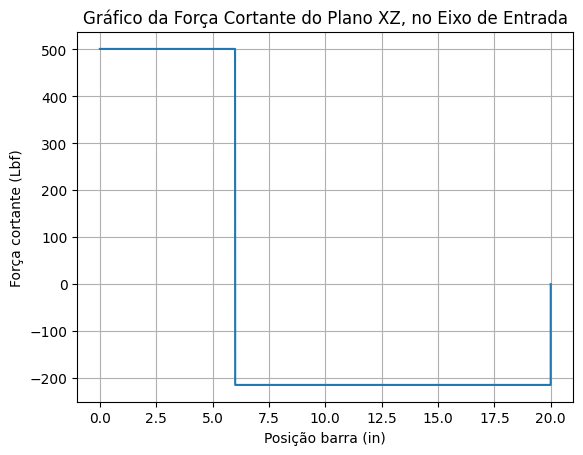

In [ ]:
Vxz1 = Az*np.heaviside(x-0,1)*(x-0)**0 +FrP1*np.heaviside(x-z,1)*(x-z)**0 +Bz*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxz1)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XZ, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

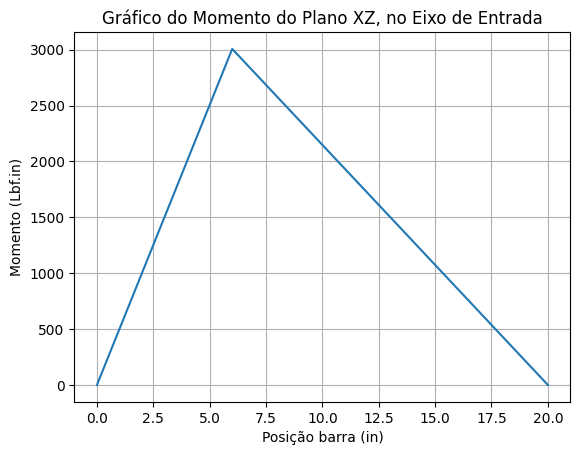

In [ ]:
Mxz1 = Az*np.heaviside(x-0,1)*(x-0)**1 +FrP1*np.heaviside(x-z,1)*(x-z)**1 +Bz*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxz1)
plt.grid()
plt.title('Gráfico do Momento do Plano XZ, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

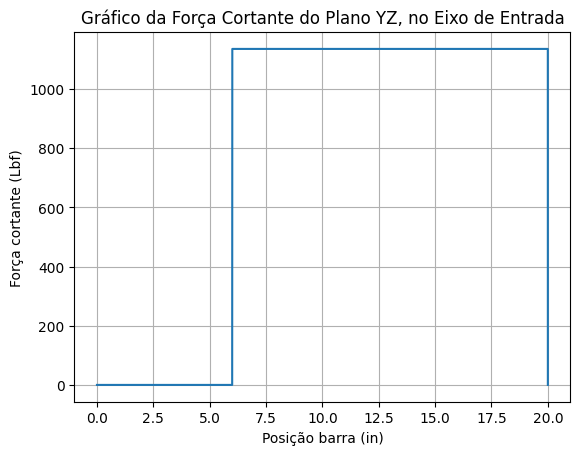

In [ ]:
Vyz1 = Ax*np.heaviside(x-0,1)*(x-0)**0 +FaP1*np.heaviside(x-z,1)*(x-z)**0 +Bx*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vyz1)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano YZ, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

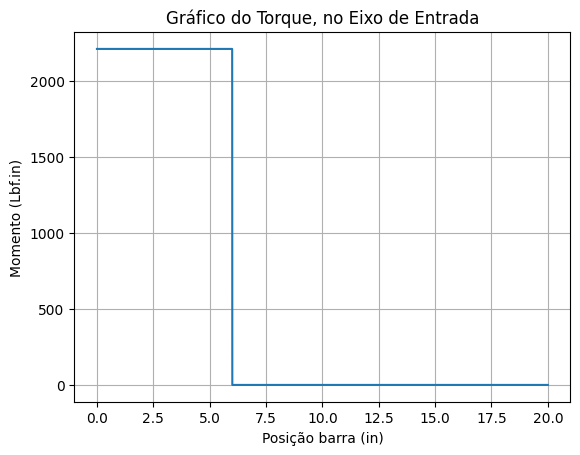

In [ ]:
Myz1 = Te*np.heaviside(x-0,1)*(x-0)**0 -Te*np.heaviside(x-z,1)*(x-z)**0 + 0*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Myz1)
plt.grid()
plt.title('Gráfico do Torque, no Eixo de Entrada')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

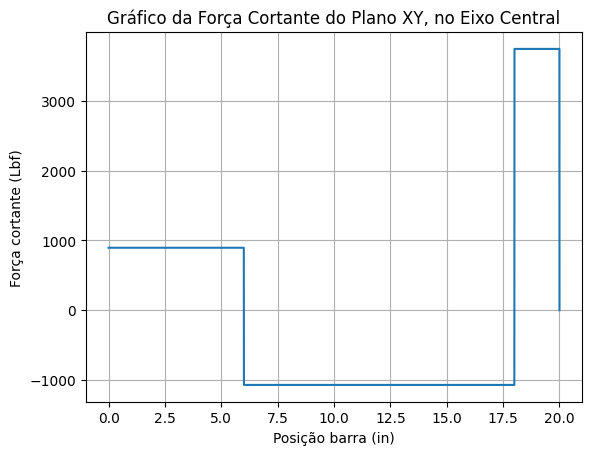

In [ ]:
Vxy2 = Cy*np.heaviside(x-0,1)*(x-0)**0 +FtG1*np.heaviside(x-z,1)*(x-z)**0 +FtP2*np.heaviside(x-b,1)*(x-b)**0 +Dy*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxy2)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XY, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

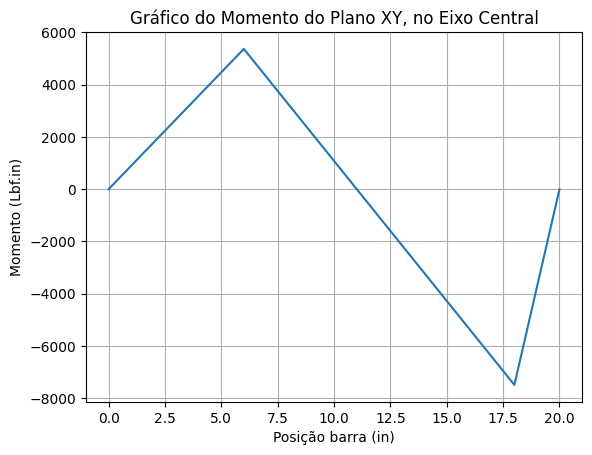

In [ ]:
Mxy2 = Cy*np.heaviside(x-0,1)*(x-0)**1 +FtG1*np.heaviside(x-z,1)*(x-z)**1 +FtP2*np.heaviside(x-b,1)*(x-b)**1 +Dy*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxy2)
plt.grid()
plt.title('Gráfico do Momento do Plano XY, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

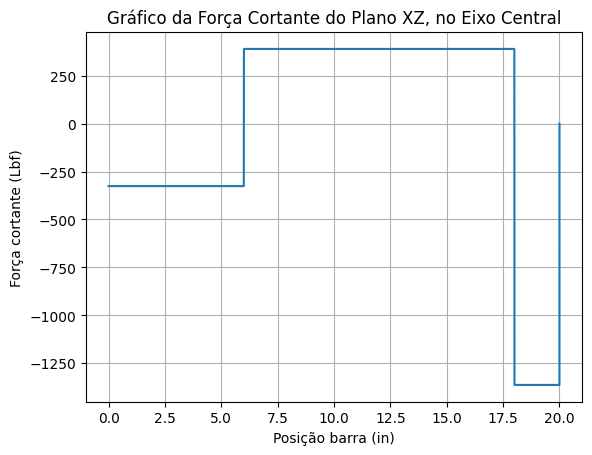

In [ ]:
Vxz2 = Cz*np.heaviside(x-0,1)*(x-0)**0 +FrG1*np.heaviside(x-z,1)*(x-z)**0 +FrP2*np.heaviside(x-b,1)*(x-b)**0 +Dz*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxz2)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XZ, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

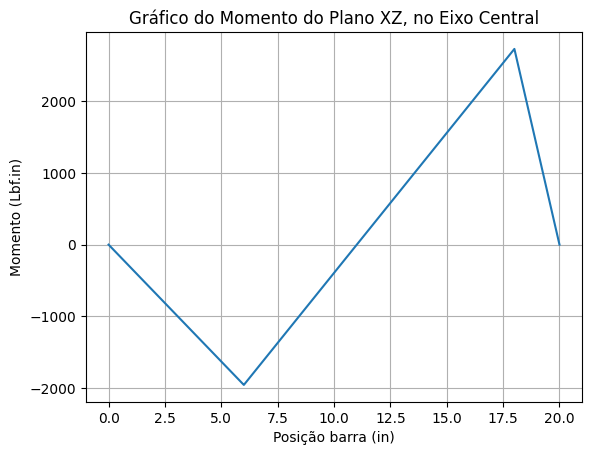

In [ ]:
Mxz2 = Cz*np.heaviside(x-0,1)*(x-0)**1 +FrG1*np.heaviside(x-z,1)*(x-z)**1 +FrP2*np.heaviside(x-b,1)*(x-b)**1 +Dz*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxz2)
plt.grid()
plt.title('Gráfico do Momento do Plano XZ, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

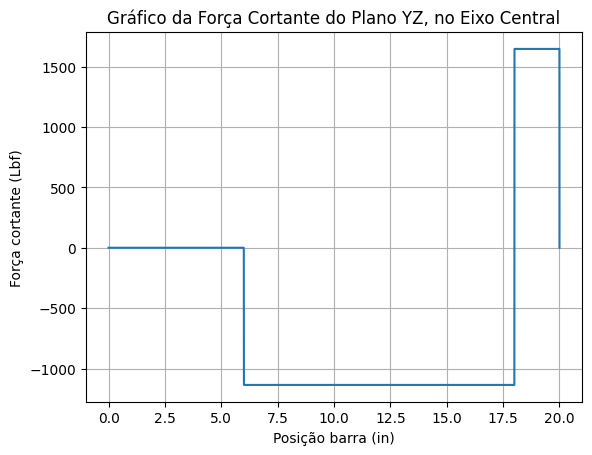

In [ ]:
Vyz2 = Cx*np.heaviside(x-0,1)*(x-0)**0 +FaG1*np.heaviside(x-z,1)*(x-z)**0 +FaP2*np.heaviside(x-b,1)*(x-b)**0 +Dx*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vyz2)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano YZ, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

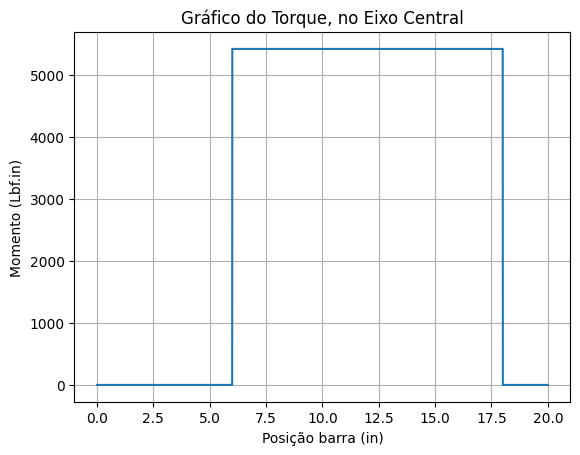

In [ ]:
Myz2 = 0*np.heaviside(x-0,1)*(x-0)**0 +Tc*np.heaviside(x-z,1)*(x-z)**0 -Tc*np.heaviside(x-b,1)*(x-b)**0 +0*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Myz2)
plt.grid()
plt.title('Gráfico do Torque, no Eixo Central')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf.in)')

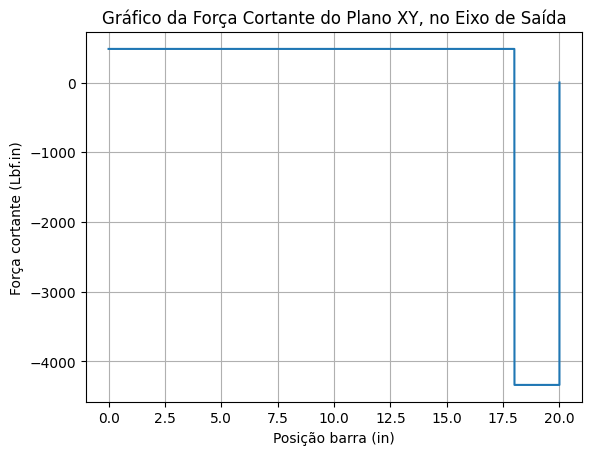

In [ ]:
Vxy3 = Ey*np.heaviside(x-0,1)*(x-0)**0 +FtG2*np.heaviside(x-b,1)*(x-b)**0 +Fy*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxy3)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XY, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf.in)')

Text(0, 0.5, 'Momento (Lbf.in)')

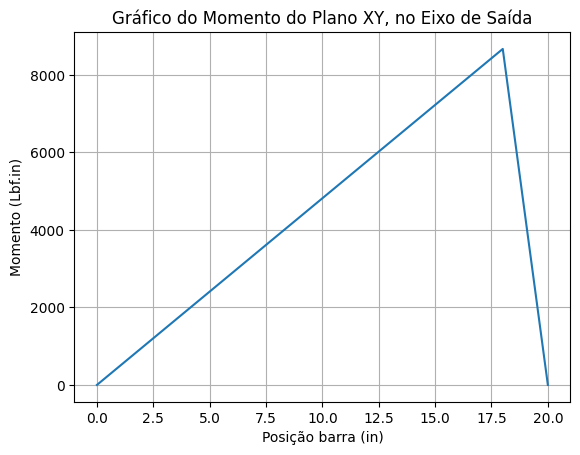

In [ ]:
Mxy3 = Ey*np.heaviside(x-0,1)*(x-0)**1 +FtG2*np.heaviside(x-b,1)*(x-b)**1 +Fy*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxy3)
plt.grid()
plt.title('Gráfico do Momento do Plano XY, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf.in)')

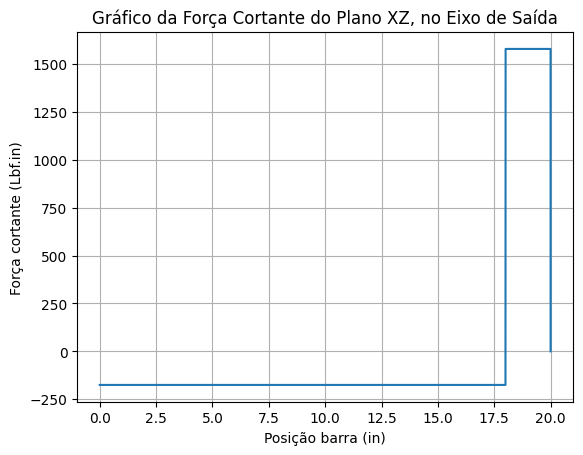

In [ ]:
Vxz3 = Ez*np.heaviside(x-0,1)*(x-0)**0 +FrG2*np.heaviside(x-b,1)*(x-b)**0 +Fz*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vxz3)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano XZ, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf.in)')

Text(0, 0.5, 'Momento (Lbf.in)')

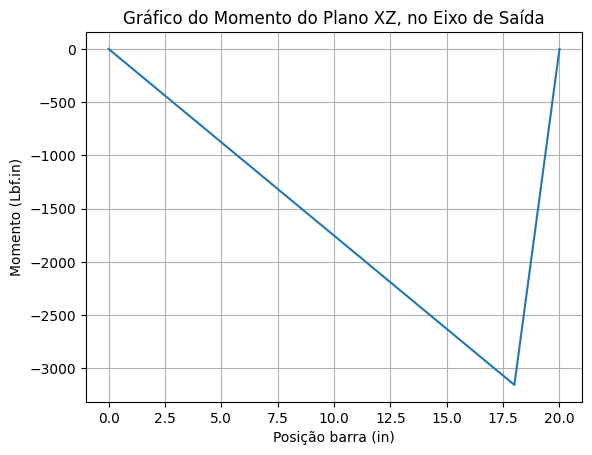

In [ ]:
Mxz3 = Ez*np.heaviside(x-0,1)*(x-0)**1 +FrG2*np.heaviside(x-b,1)*(x-b)**1 +Fz*np.heaviside(x-Eixo,1)*(x-Eixo)**1
plt.plot(x,Mxz3)
plt.grid()
plt.title('Gráfico do Momento do Plano XZ, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Text(0, 0.5, 'Força cortante (Lbf)')

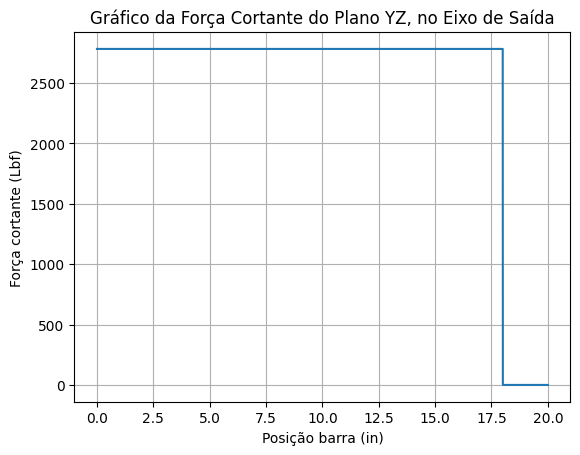

In [ ]:
Vyz3 = Ex*np.heaviside(x-0,1)*(x-0)**0 +FaG2*np.heaviside(x-b,1)*(x-b)**0 +Fx*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Vyz3)
plt.grid()
plt.title('Gráfico da Força Cortante do Plano YZ, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Força cortante (Lbf)')

Text(0, 0.5, 'Momento (Lbf.in)')

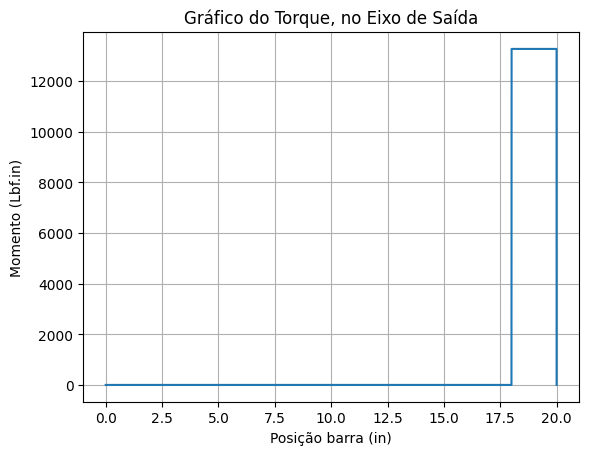

In [ ]:
Myz3 = 0*np.heaviside(x-0,1)*(x-0)**0 +Ts*np.heaviside(x-b,1)*(x-b)**0 -Ts*np.heaviside(x-Eixo,1)*(x-Eixo)**0
plt.plot(x,Myz3)
plt.grid()
plt.title('Gráfico do Torque, no Eixo de Saída')
plt.xlabel('Posição barra (in)')
plt.ylabel('Momento (Lbf.in)')

Cálculo dos Concentradores de tensão

In [ ]:
#Propriedades: material escolhido: Aço 1080
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d27982685cce4a4f81cf8587fd7b5905
Sut = 97900 #psi
Sy = 74700 #psi
#Primeiro, encontram-se os concentradores de tensão para o rasgo de chaveta
r = 0.01 #Assumir 1,27mm para rasgo de chaveta
#Do gráfico 6-35 de Norton:
Neuber = 0.065
NeuberS = 0.055
q = 1/(1 + Neuber/math.sqrt(r))
qs = 1/(1 + NeuberS/math.sqrt(r))
#Chute dos valores de Kt e Kts (análogo ao Norton 10-1):
Kte = 3.5
Kts = 2
Kf = 1 + q*(Kte-1)
Kfs = 1 + qs*(Kts-1)
print(q,qs)
print(Kf,Kfs)

0.6060606060606061 0.6451612903225807
2.515151515151515 1.6451612903225807


Diâmetros dos eixos com Kt e Kts aleatórios (Norton 10-1)

In [ ]:
Ccar = 1 #Flexão
Ctam = 1 #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha

#Equações Gerais:
Ta = 0
Mm = 0
Kfm = Kf
Kfsm = Kfs
Nf = 2.16 #Arbitrário
M1 = math.sqrt((L1*Ay)**2 + (L1*Az)**2) #No Pinhão 1 do Eixo de Entrada
Ma = M1 #Em lbf.in
Tm = Te #Em lbf.in
d11 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*((Kfsm*Tm)**2)))/Sut)))**(1/3)
print(d11)
Ctam = 0.869*(d11**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d12 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d12,(d12-d11)/d12)
Ctam = 0.869*(d12**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d13 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d13,(d13-d12)/d13)
Ctam = 0.869*(d13**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d14 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d14,(d14-d13)/d14)


2.3579696834885584
2.531245257588047 0.06845467604533831
2.536802220799086 0.002190538610175292
2.5369742935878277 6.78259882950622e-05


In [ ]:
Ctam = 1
M2 = math.sqrt((L1*Cy)**2 + (L1*Cz)**2) #Na Engrenagem 1 do Eixo Central
Ma = M2 #Em lbf.in
Tm = Tc
d21 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d21)
Ctam = 0.869*(d21**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d22 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d22,(d22-d21)/d22)
Ctam = 0.869*(d22**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d23 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d23,(d23-d22)/d23)
Ctam = 0.869*(d23**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d24 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d24,(d24-d23)/d24)

2.2823868052213583
2.275740777931419 -0.0029203797525569537
2.2755578087604915 -8.040629432627005e-05
2.275552764269793 -2.216819920723825e-06


In [ ]:
Ctam = 1
M22 = math.sqrt((L3*Dy)**2 + (L3*Dz)**2) #No Pinhão 2 do Eixo Central
Ma = M22
Tm = Tc
d221 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d221)
Ctam = 0.869*(d221**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d222 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d222,(d222-d221)/d222)
Ctam = 0.869*(d222**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d223 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d223,(d223-d222)/d223)
Ctam = 0.869*(d223**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d224 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d224,(d224-d223)/d224)
print(d224-d24, M22)

2.506813406311632
2.5138074713227994 0.002782259616519841
2.5140091994161042 8.024158915239e-05
2.514015009806821 2.311199692086035e-06
0.23846224553702777 7972.592364279044


In [ ]:
Ctam = 1
M3 = math.sqrt((Ey*b)**2 + (Ez*b)**2) #Na Engrenagem 2 do Eixo de Saída
Ma = M3
Tm = Ts
d31 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d31)
Ctam = 0.869*(d31**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d32 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d32,(d32-d31)/d32)
Ctam = 0.869*(d32**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d33 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d33,(d33-d32)/d33)
Ctam = 0.869*(d33**-0.097) #Com d entre 0,3 e 10 polegadas
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
d34 = ((32*Nf/np.pi)*(((math.sqrt((Kf*Ma)**2 + 0.75*(Kfs*Ta)**2))/Se) + ((math.sqrt((Kfm*Mm)**2 + 0.75*(Kfsm*Tm)**2))/Sut)))**(1/3)
print(d34,(d34-d33)/d34)

2.742811575256174
2.7489571969587496 0.0022356192775117734
2.749115428129799 5.7557121621822156e-05
2.7491194976439663 1.480297299158484e-06


Refeitura dos diâmetros através dos Coeficientes de Segurança de chavetas

In [ ]:
Ccar = 1 #Flexão
Ctam = 0.869*(d14**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha

#Equações Gerais:
Ta = 0
Mm = 0
#Do gráfico 10-16 de Norton, assumindo d = 2,537in:
KtC1 = 1.875
KtsC1 = 2.65
KfC1 = 1 + q*(KtC1-1)
KfsC1 = 1 + qs*(KtsC1-1)
Kfm1 = KfC1
Kfsm1 = KfsC1
M1 = math.sqrt((L1*Ay)**2 + (L1*Az)**2) #No Pinhão 1 do Eixo de Entrada
Ma = M1
Tm = Te
CS1 = (np.pi*(d14**3))/(32*(((math.sqrt((KfC1*Ma)**2 + 0.75*(KfsC1*Ta)**2))/Se) + ((math.sqrt((Kfm1*Mm)**2 + 0.75*(Kfsm1*Tm)**2))/Sut)))
print(CS1)
#Pode-se reduzir o diâmetro para um valor apropriado: D14 = 2,25in
D14 = 2.25
Ccar = 1 #Flexão
Ctam = 0.869*(D14**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS1 = (np.pi*(D14**3))/(32*(((math.sqrt((KfC1*Ma)**2 + 0.75*(KfsC1*Ta)**2))/Se) + ((math.sqrt((Kfm1*Mm)**2 + 0.75*(Kfsm1*Tm)**2))/Sut)))
print(CS1)

3.393626883373378
2.392684780718606


In [ ]:
Ccar = 1 #Flexão
Ctam = 0.869*(d24**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
#Do gráfico 10-16 de Norton, assumindo d = 2,2755 in:
KtC2 = 1.8333
KtsC2 = 2.5625
KfC2 = 1 + q*(KtC2-1)
KfsC2 = 1 + qs*(KtsC2-1)
Kfm2 = KfC2
Kfsm2 = KfsC2
M2 = math.sqrt((L1*Cy)**2 + (L1*Cz)**2) #Na Engrenagem 1 do Eixo Central
Ma = M2
Tm = Tc
CS2 = (np.pi*(d24**3))/(32*(((math.sqrt((KfC2*Ma)**2 + 0.75*(KfsC2*Ta)**2))/Se) + ((math.sqrt((Kfm2*Mm)**2 + 0.75*(Kfsm2*Tm)**2))/Sut)))
print(CS2)
#Pode-se reduzir o diâmetro para um valor apropriado: D24 = 2,05 in
D24 = 2.05
Ccar = 1 #Flexão
Ctam = 0.869*(D24**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS2 = (np.pi*(D24**3))/(32*(((math.sqrt((KfC2*Ma)**2 + 0.75*(KfsC2*Ta)**2))/Se) + ((math.sqrt((Kfm2*Mm)**2 + 0.75*(Kfsm2*Tm)**2))/Sut)))
print(CS2)

3.1303293502815954
2.3058884340843893


In [ ]:
Ccar = 1 #Flexão
Ctam = 0.869*(d224**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
#Do gráfico 10-16 de Norton, assumindo d = 2,514 in:
KtC3 = 1.8625
KtsC3 = 2.6375
KfC3 = 1 + q*(KtC3-1)
KfsC3 = 1 + qs*(KtsC3-1)
Kfm3 = KfC3
Kfsm3 = KfsC3
M22 = math.sqrt((L3*Dy)**2 + (L3*Dz)**2) #No Pinhão 2 do Eixo Central
Ma = M22
Tm = Tc
CS3 = (np.pi*(d224**3))/(32*(((math.sqrt((KfC3*Ma)**2 + 0.75*(KfsC3*Ta)**2))/Se) + ((math.sqrt((Kfm3*Mm)**2 + 0.75*(Kfsm3*Tm)**2))/Sut)))
print(CS3)
#Pode-se reduzir o diâmetro para um valor apropriado: D224 = 2,25 in
D224 = 2.25
Ccar = 1 #Flexão
Ctam = 0.869*(D224**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS3 = (np.pi*(D224**3))/(32*(((math.sqrt((KfC3*Ma)**2 + 0.75*(KfsC3*Ta)**2))/Se) + ((math.sqrt((Kfm3*Mm)**2 + 0.75*(Kfsm3*Tm)**2))/Sut)))
print(CS3)

3.196106487725543
2.3109519277153034


In [ ]:
Ccar = 1 #Flexão
Ctam = 0.869*(d34**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
#Do gráfico 10-16 de Norton, assumindo d = 2,7491 in:
KtC4 = 1.925
KtsC4 = 2.725
KfC4 = 1 + q*(KtC4-1)
KfsC4 = 1 + qs*(KtsC4-1)
Kfm4 = KfC4
Kfsm4 = KfsC4
M3 = math.sqrt((Ey*b)**2 + (Ez*b)**2) #Na Engrenagem 2 do Eixo de Saída
Ma = M3
Tm = Ts
CS4 = (np.pi*(d34**3))/(32*(((math.sqrt((KfC4*Ma)**2 + 0.75*(KfsC4*Ta)**2))/Se) + ((math.sqrt((Kfm4*Mm)**2 + 0.75*(Kfsm4*Tm)**2))/Sut)))
print(CS4)
#Pode-se reduzir o diâmetro para um valor apropriado: D34 = 2,5 in
D34 = 2.5
Ccar = 1 #Flexão
Ctam = 0.869*(D34**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS4 = (np.pi*(D34**3))/(32*(((math.sqrt((KfC3*Ma)**2 + 0.75*(KfsC3*Ta)**2))/Se) + ((math.sqrt((Kfm3*Mm)**2 + 0.75*(Kfsm3*Tm)**2))/Sut)))
print(CS4)

2.8560106770707767
2.216449970980541


Recálculo das chavetas

In [ ]:
#Da tabela 10-2 de Norton, para os diâmetros propostos:
l1 = 0.5 #Chute inicial em in (Aproximado de 12,5mm)
l2 = 0.98 #Chute inicial em in (Aproximado de 25mm)
l3 = 0.98 #Chute inicial em in (Aproximado de 25mm)
l4 = 1.5748 #Chute inicial em in (Aproximado de 40mm)
b1 = 0.5 #Em in
b2 = 0.5 #Em in
b3 = 0.625 #Em in
#Material escolhido: Aço 1010, usinado, feito por laminação a quente, dado como usinado
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=7573afc5e06c4a518c01efba4690182c
SutC = 47100 #kpsi
SyC = 26100 #kpsi
#Chaveta de Cima:
Fm1 = (Te)/(D14/2) #Lbf
TauM1 = Fm1/(b1*l1) #psi
Sigma_M1 = math.sqrt(3)*TauM1
Nfc1 = SyC/Sigma_M1
Ae1 = (b1/2)*l1
Sigma_Max1 = (Te/(D14/2))/Ae1
Nfe1 = SyC/Sigma_Max1
#Chaveta Esquerda:
Fm2 = Tc/(D24/2) #Lbf
TauM2 = Fm2/(b2*l2)
Sigma_M2 = math.sqrt(3)*TauM2
Nfc2 = SyC/Sigma_M2
Ae2 = (b2/2)*l2
Sigma_Max2 = (Tc/(D24/2))/Ae2
Nfe2 = SyC/Sigma_Max2
#Chaveta Direita:
Fm3 = Tc/(D224/2) #Lbf
TauM3 = Fm3/(b2*l3)
Sigma_M3 = math.sqrt(3)*TauM3
Nfc3 = SyC/Sigma_M3
Ae3 = (b2/2)*l3
Sigma_Max3 = (Tc/(D224/2))/Ae3
Nfe3 = SyC/Sigma_Max3
#Chaveta de Baixo:
Fm4 = Ts/(D34/2) #Lbf
TauM4 = Fm4/(b3*l4)
Sigma_M4 = math.sqrt(3)*TauM4
Nfc4 = SyC/Sigma_M4
Ae4 = (b3/2)*l4
Sigma_Max4 = (Ts/(D34/2))/Ae4
Nfe4 = SyC/Sigma_Max4

print(Nfc1, Nfc2, Nfc3, Nfc4)
print(Nfe1, Nfe2, Nfe3, Nfe4)

1.9153792670727046 1.3963894893751716 1.5326226102898228 1.3964533656417106
1.658767103166981 1.209308771376479 1.3272901149254042 1.2093640898460007


Análise dos diâmetros restantes dos eixos por ressaltos

In [ ]:
#Conforme sugestão de Norton (Pg. 191), para obter uma melhor concetração de tensão nos ressaltos, deve-se definir menores D/d e maior R
#Portanto, para cada ressalto, será escolhido um valor de D que seja o próximo padronizado de d (encontrado no item anterior, análogo ao sugerido no Exemplo 10-1)
#Para Ressalto entre Pinhão 1 e restante do Eixo de Entrada: D = 2,5 in = D/d = 1,1111
D1 = 2.5
rd1 = 0.1111
#Os resultados obtidos pelo equacionamento mostrado nos apêndices C-2 e C-3 foram, por interpolação linear:
CoeficienteA1 = 0.9534
CoeficienteB1 = -0.2354
CoeficienteA1s = 0.8901
CoeficienteB1s = -0.1441
Ktr = CoeficienteA1*(rd1**CoeficienteB1)
Ktsr = CoeficienteA1s*(rd1**CoeficienteB1s)
#Para as 4 engrenagens, assumir um mesmo raio de ressalto:
R = 0.25 #Assumir 6,35mm para ressalto
#Coeficiente de entalhe dado pela Figura 6-36 parte 1:
qr = 1/(1 + Neuber/math.sqrt(R))
qsr = 1/(1 + NeuberS/math.sqrt(R))
#Propriedades: material escolhido: Aço 1080
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d27982685cce4a4f81cf8587fd7b5905
Sut = 97900 #kpsi
Sy = 74700 #kpsi
Kfr = 1 + qr*(Ktr-1)
Kfsr = 1 + qsr*(Ktsr-1)
Ccar = 1 #Flexão
Ctam = 0.869*(D1**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
Kfmr = Kfr
Kfsmr = Kfsr
M1 = math.sqrt((L1*Ay)**2 + (L1*Az)**2) #No Pinhão 1 do Eixo de Entrada
Ma = M1
Tm = Te
CS1rD = (np.pi*(D1**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS1rD) #Verifica-se se o diâmetro escolhido para o Eixo de Entrada suporta aquela concentração de tensão, dado o ressalto R
Ccar = 1 #Flexão
Ctam = 0.869*(D14**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS1rd = (np.pi*(D14**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS1rd) #Verifica-se se o diâmetro escolhido para o Pinhão 1 suporta aquela concentração de tensão, dado o ressalto R

3.3726504251763245
2.482601815718456


In [ ]:
#Para o Eixo Central, basta determinar o diâmetro para o D/d mais solicitado: na Engrenagem 1, posto que D24 < D224
#Para Ressalto entre Engrenagem 1 e restante do Eixo Central: D = 2,5 in = D/d = 1,2195
D2 = 2.5
rd2 = 0.12195
#Os resultados obtidos pelo equacionamento mostrado nos apêndices C-2 e C-3 foram, por interpolação linear:
CoeficienteA2 = 0.9689
CoeficienteB2 = -0.2205
CoeficienteA2s = 0.8365
CoeficienteB2s = -0.2188
Ktr = CoeficienteA2*(rd2**CoeficienteB2)
Ktsr = CoeficienteA2s*(rd2**CoeficienteB2s)
#Para as 4 engrenagens, assumir um mesmo raio de ressalto:
R = 0.25 #Assumir 6,35mm para ressalto
#Coeficiente de entalhe dado pela Figura 6-36 parte 1:
qr = 1/(1 + Neuber/math.sqrt(R))
qsr = 1/(1 + NeuberS/math.sqrt(R))
#Propriedades: material escolhido: Aço 1080
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d27982685cce4a4f81cf8587fd7b5905
Sut = 97900 #kpsi
Sy = 74700 #kpsi
Kfr = 1 + qr*(Ktr-1)
Kfsr = 1 + qsr*(Ktsr-1)
Ccar = 1 #Flexão
Ctam = 0.869*(D2**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
Kfmr = Kfr
Kfsmr = Kfsr
M2 = math.sqrt((L1*Cy)**2 + (L1*Cz)**2) #Na Engrenagem 1 do Eixo Central
Ma = M2
Tm = Tc
CS2rD = (np.pi*(D2**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS2rD) #Verifica-se se o diâmetro escolhido para o Eixo Central suporta aquela concentração de tensão, dado o ressalto R
Ccar = 1 #Flexão
Ctam = 0.869*(D24**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS2rd = (np.pi*(D24**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS2rd) #Verifica-se se o diâmetro escolhido para a Engrenagem 1 suporta aquela concentração de tensão, dado o ressalto R

4.607161075386576
2.580274008062359


In [ ]:
#Para verficação, analisa-se a relação para o Pinhão 2 no Eixo Central. Perceba relação geométrica idêntica ao Pinhão 1, porém com forças diferentes.
#Para Ressalto entre Pinhão 2 e restante do Eixo Central: D = 2,5 in = D/d = 1,1111
D22 = D2
rd22 = 0.1111
#Os resultados obtidos pelo equacionamento mostrado nos apêndices C-2 e C-3 foram, por interpolação linear:
CoeficienteA22 = 0.9534
CoeficienteB22 = -0.2354
CoeficienteA22s = 0.8901
CoeficienteB22s = -0.1441
Ktr = CoeficienteA22*(rd22**CoeficienteB22)
Ktsr = CoeficienteA22s*(rd22**CoeficienteB22s)
#Para as 4 engrenagens, assumir um mesmo raio de ressalto:
R = 0.25 #Assumir 6,35mm para ressalto
#Coeficiente de entalhe dado pela Figura 6-36 parte 1:
qr = 1/(1 + Neuber/math.sqrt(R))
qsr = 1/(1 + NeuberS/math.sqrt(R))
#Propriedades: material escolhido: Aço 1080
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d27982685cce4a4f81cf8587fd7b5905
Sut = 97900 #kpsi
Sy = 74700 #kpsi
Kfr = 1 + qr*(Ktr-1)
Kfsr = 1 + qsr*(Ktsr-1)
Ccar = 1 #Flexão
Ctam = 0.869*(D22**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
Kfmr = Kfr
Kfsmr = Kfsr
M22 = math.sqrt((L3*Dy)**2 + (L3*Dz)**2) #No Pinhão 2 do Eixo Central
Ma = M22
Tm = Tc
CS22rD = (np.pi*(D22**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS22rD) #Verifica-se se o diâmetro escolhido para o Eixo Central suporta aquela concentração de tensão, dado o ressalto R
Ccar = 1 #Flexão
Ctam = 0.869*(D224**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS22rd = (np.pi*(D224**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS22rd) #Verifica-se se o diâmetro escolhido para o Pinhão 2 suporta aquela concentração de tensão, dado o ressalto R

3.4185814474072385
2.5144351973125945


In [ ]:
#Para Ressalto entre Engrenagem 2 e restante do Eixo de Saída: D = 2,75 in = D/d = 1,1
D3 = 2.75
rd3 = 0.1
#Os resultados obtidos pelo equacionamento mostrado nos apêndices C-2 (tabelado) e C-3 foram, por interpolação linear:
CoeficienteA3 = 0.9512
CoeficienteB3 = -0.23757
CoeficienteA3s = 0.8971
CoeficienteB3s = -0.1351
Ktr = CoeficienteA3*(rd3**CoeficienteB3)
Ktsr = CoeficienteA3s*(rd3**CoeficienteB3s)
#Para as 4 engrenagens, assumir um mesmo raio de ressalto:
R = 0.25 #Assumir 6,35mm para ressalto
#Coeficiente de entalhe dado pela Figura 6-36 parte 1:
qr = 1/(1 + Neuber/math.sqrt(R))
qsr = 1/(1 + NeuberS/math.sqrt(R))
#Propriedades: material escolhido: Aço 1080
#Fonte: http://www.matweb.com/search/DataSheet.aspx?MatGUID=d27982685cce4a4f81cf8587fd7b5905
Sut = 97900 #kpsi
Sy = 74700 #kpsi
Kfr = 1 + qr*(Ktr-1)
Kfsr = 1 + qsr*(Ktsr-1)
Ccar = 1 #Flexão
Ctam = 0.869*(D3**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
Kfmr = Kfr
Kfsmr = Kfsr
M3 = math.sqrt((b*Ey)**2 + (b*Ez)**2) #Na Engrenagem 2 do Eixo de Saída
Ma = M3
Tm = Ts
CS3rD = (np.pi*(D3**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS3rD) #Verifica-se se o diâmetro escolhido para o Eixo de Saída suporta aquela concentração de tensão, dado o ressalto R
Ccar = 1 #Flexão
Ctam = 0.869*(D34**-0.097) #Chute inicial
Csup = 2.7*((Sut/1000)**-0.265) #Sut em kpsi, dado como usinado
Ctem = 1 # <450°C em operação
Ccon = 1 #Confiabilidade indefinida (50%)
SeLinha = 0.5*Sut
Se = Ccar*Ctam*Csup*Ctem*Ccon*SeLinha
CS3rd = (np.pi*(D34**3))/(32*(((math.sqrt((Kfr*Ma)**2 + 0.75*(Kfsr*Ta)**2))/Se) + ((math.sqrt((Kfmr*Mm)**2 + 0.75*(Kfsmr*Tm)**2))/Sut)))
print(CS3rd) #Verifica-se se o diâmetro escolhido para a Engrenagem 2 suporta aquela concentração de tensão, dado o ressalto R

3.347189399220366
2.532705407110241


Análise dos mancais de rolamento

In [ ]:
#Para Mancal A: define-se um Mancal modelo 6311:
dA = 2.1654 #Em in
RotA = 5000 #Em rpm
Fda = 12900 #Em lbf
Fea = 10000 #Em lbf
#Ausência de forças axiais: Cálculo conforme Exemplo 11-3:
Pay = -Ay #Uso da Força Tangencial em lbf
VidaL10A = ((Fda/Pay)**3)*1000000 #Vida útil, em ciclos
AnosA = VidaL10A/(Rot*60*10*261) #Anos úteis de operação do mancal
print(VidaL10A, AnosA)
#Para obter um valor inteiro: Assumir 3 anos. Isso leva a alteração na probabilidade de falha.
#Como, entre P10 e P50 há uma linearidade, enonctra-se a probabilidade de falha por razão simples: 10 - 1 <> X - 10X
KrA = (3/AnosA)*10 #Fator de confiabilidade assumido para o Mancal A
#O resultado final é de que o mancal utilizado em A terá 3 anos de vida útil com 10,28% de probabilidade de falha.
print(KrA) #Valor em porcentagem de falha

822582926.8182498 2.9182025217051577
10.280300896481462


In [ ]:
#Para Mancal B: define-se um Mancal modelo 6312:
dB = 2.3622 # Em in
RotB = 5000 #Em rpm
Fdb = 14000 #Em lbf
Feb = 10800 #Em lbf
#Nesse caso, realiza-se 2 operações para determinar a força aplicada P:
#Para análise sob força tangencial (análogo ao exemplo 11-3):
Pby = -By #Uso da Força Tangencial em lbf
VidaL10Bt = ((Fdb/Pby)**3)*1000000 #Vida útil, em ciclos
AnosBt = VidaL10Bt/(Rot*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Bt, AnosBt)
#Para análise sob forças radial e axial combinadas (análogo ao exemplo 11-4):
Pbx = -Bx #Uso da Força Axial em lbf
Pbz = Bz #Uso da Força Radial em lbf
#Com a obtenção de Fa/(V*Fr) > e, faz-se a interpolação de valores de X e Y:
V = 1 #Anel interno estacionário
X = 0.56
Y = 1.4688
Pb = V*X*Pbz + Y*Pbx
VidaL10Bra = ((Fdb/Pb)**3)*1000000
AnosBra = VidaL10Bra/(Rot*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Bra, AnosBra)
#Vê-se que a falha ocorre primordialmente em função das componentes radiais e axiais.
#Para obter um valor inteiro: Assumir 1,5 anos. Isso leva a alteração na probabilidade de falha.
#A probablididade de falha, para valores inferiores a 10%, é obtida por interpolação linear:
KrB = ((((1.5/AnosBra)-0.62)*(10-5))/(1-0.62))+5 #Fator de confiabilidade assumido para o Mancal B
#O resultado final é de que o mancal utilizado em B terá 1,5 anos de vida útil com 8,43% de probabilidade de falha.
print(KrB) #Valor em porcentagem de falha

13357495091.241926 47.387168622257434
479920336.52694273 1.7025696627179747
8.434489726155638


In [ ]:
#Para Mancal C: define-se um Mancal modelo 6310:
dC = 1.9685 #Em in
RotC = 6000 #Em rpm
Fdc = 10600 #Em lbf
Fec = 8150 #Em lbf
#Nesse caso, realiza-se 2 operações para determinar a força aplicada P:
#Para análise sob força tangencial (análogo ao exemplo 11-3):
Pcy = Cy #Uso da Força Tangencial em lbf
VidaL10C = ((Fdc/Pcy)**3)*1000000 #Vida útil, em ciclos
AnosC = VidaL10C/(Rot*60*10*261) #Anos úteis de operação do mancal
print(VidaL10C, AnosC)
#Para obter um valor inteiro: Assumir 6 anos. Isso leva a alteração na probabilidade de falha.
#Como, entre P10 e P50 há uma linearidade, enonctra-se a probabilidade de falha por razão simples: 10 - 1 <> X - 10X
KrCMais = (6/AnosC)*10 #Fator de confiabilidade assumido para o Mancal C
#Um resultado final é de que o mancal utilizado em C terá 6 anos de vida útil com 10,18% de probabilidade de falha.
print(KrCMais) #Valor em porcentagem de falha
#Alternativa: Para o Mancal C, em específico, pode-se reduzir para 5,5 anos úteis, diminuindo a probabilidade de falha:
#A probablididade de falha, para valores inferiores a 10%, é obtida por interpolação linear:
KrCMenos = ((((5.5/AnosC)-0.62)*(10-5))/(1-0.62))+5 #Fator de confiabilidade assumido para o Mancal C
#O resultado final assumido é de que o mancal utilizado em C terá 5,5 anos de vida útil com 9,12% de probabilidade de falha.
print(KrCMenos) #Valor em porcentagem de falha

1661276735.493911 5.893560151461299
10.180603651788145
9.12134212386728


In [ ]:
#Para Mancal D: define-se um Mancal modelo 6312:
dD = 2.3622 #Em in
D224 = dD #Conforme visto por coeficientes de segurança anteriores, pode-se aumentar o diâmetro do eixo para encaixar o mancal
RotD = 5000 #Em rpm
Fdd = 14000 #Em lbf
Fed = 10800 #Em lbf
#Nesse caso, realiza-se 2 operações para determinar a força aplicada P:
#Para análise sob força tangencial (análogo ao exemplo 11-3):
Pdy = -Dy #Uso da Força Tangencial em lbf
VidaL10Dt = ((Fdd/Pdy)**3)*1000000 #Vida útil, em ciclos
AnosDt = VidaL10Dt/(Rot2*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Dt, AnosDt)
#Para análise sob forças radial e axial combinadas (análogo ao exemplo 11-4):
Pdx = -Dx #Uso da Força Axial em lbf
Pdz = Dz #Uso da Força Radial em lbf
#Com a obtenção de Fa/(V*Fr) > e, faz-se a interpolação de valores de X e Y:
V = 1 #Anel interno estacionário
X = 0.56
Y = 1.3511
Pd = V*X*Pdz + Y*Pdx
VidaL10Dra = ((Fdd/Pd)**3)*1000000
AnosDra = VidaL10Dra/(Rot2*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Dra, AnosDra)
#Vê-se que a falha ocorre primordialmente em função da componente tangencial
#Para obter um valor inteiro: Assumir 0,5 anos. Isso leva a alteração na probabilidade de falha.
#Como, entre P10 e P50 há uma linearidade, enonctra-se a probabilidade de falha por razão simples: 10 - 1 <> X - 10X
KrD = (0.5/AnosDt)*10 #Fator de confiabilidade assumido para o Mancal A
#O resultado final é de que o mancal utilizado em D terá 0,5 ano de vida útil com 11,04% de probabilidade de falha.
print(KrD) #Valor em porcentagem de falha

52205705.20419033 0.45272437226723233
102925258.37725604 0.8925609338487743
11.044247463329896


In [ ]:
#Para Mancal E: define-se um Mancal modelo 6313:
dE = 2.5591 #Em in
RotE = 4500 #Em rpm
Fde = 16000 #Em lbf
Fee = 12500 #Em lbf
#Nesse caso, realiza-se 2 operações para determinar a força aplicada P:
#Para análise sob força tangencial (análogo ao exemplo 11-3):
Pey = Ey #Uso da Força Tangencial em lbf
VidaL10Et = ((Fde/Pey)**3)*1000000 #Vida útil, em ciclos
AnosEt = VidaL10Et/(Rot2*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Et, AnosEt)
#Para análise sob forças radial e axial combinadas (análogo ao exemplo 11-4):
Pex = Ex #Uso da Força Axial em lbf
Pez = -Ez #Uso da Força Radial em lbf
#Com a obtenção de Fa/(V*Fr) > e, faz-se a interpolação de valores de X e Y:
V = 1 #Anel interno estacionário
X = 0.56
Y = 1.2336
Pe = V*X*Pez + Y*Pex
VidaL10Era = ((Fde/Pe)**3)*1000000
AnosEra = VidaL10Era/(Rot2*60*10*261) #Anos úteis de operação do mancal
print(VidaL10Era, AnosEra)
#Vê-se que a falha ocorre primordialmente em função da componente tangencial
#Dessa forma, estabelece-se um valor de 1 ano útil para o Mancal E.
#Como, entre P10 e P50 há uma linearidade, enonctra-se a probabilidade de falha por razão simples: 10 - 1 <> X - 10X
KrE = (1/AnosEra)*10 #Fator de confiabilidade assumido para o Mancal A
#O resultado final é de que o mancal utilizado em E terá 1 ano de vida útil com 12,38% de probabilidade de falha.
print(KrE) #Valor em porcentagem de falha

36630070351.79341 317.65351203012114
93160995.24603556 0.8078858992056439
12.377985566813987


In [ ]:
#Para Mancal F: define-se um Mancal modelo 6313:
dF = 2.5591 #Em in
D34 = dF #Conforme visto por coeficientes de segurança anteriores, pode-se aumentar o diâmetro do eixo para encaixar o mancal.
RotF = 4500 #Em rpm
Fdf = 16000 #Em lbf
Fef = 12500 #Em lbf
#Nesse caso, realiza-se 2 operações para determinar a força aplicada P:
#Para análise sob força tangencial (análogo ao exemplo 11-3):
Pfy = Fy #Uso da Força Tangencial em lbf
VidaL10F = ((Fdf/Pfy)**3)*1000000 #Vida útil, em ciclos
AnosF = VidaL10F/(Rot2*60*10*261) #Anos úteis de operação do mancal
print(VidaL10F, AnosF)
#Para obter um valor inteiro: Assumir 0,5 ano. Isso leva a alteração na probabilidade de falha.
#Como, entre P10 e P50 há uma linearidade, enonctra-se a probabilidade de falha por razão simples: 10 - 1 <> X - 10X
KrF = (0.5/AnosF)*10 #Fator de confiabilidade assumido para o Mancal F
#O resultado final é de que o mancal utilizado em F terá 0,5 ano de vida útil com 11,47% de probabilidade de falha.
print(KrF) #Valor em porcentagem de falha

50247010.08476451 0.43573869962979483
11.47476688264783


Estimativa de massa dos Componentes

In [ ]:
#Engrenagens
#Fonte: https://kupdf.net/download/elementos-de-maquinas-sarkis-melconianpdf_5a5a1dcce2b6f5a738d0d929_pdf
Vp1 = (F1*(dpp**2))*16.3871 #Volume do Pinhão 1 em cm^3
Vg1 = (F1*(dpg**2))*16.3871 #Volume da Engrenagem 1 em cm^3
Vp2 = (F2*(dpp**2))*16.3871 #Volume do Pinhão 2 em cm^3
Vg2 = (F2*(dpg**2))*16.3871 #Volume da Engrenagem 2 em cm^3
print(Vp1,Vg1,Vp2,Vg2)
#Pela massa específica, é feito cálculo da massa por: Massa = Massa Específica*Volume
MeP = 7.85 #Massa específica dos pinhões, em g/cm^3
MeG =  7.8 #Massa específica das engrenagens, em g/cm^3
#Dessa forma, são fornecidos os valores em kg:
Mp1 = (MeP*Vp1)/1000 #Massa do Pinhão 1
Mg1 = (MeG*Vg1)/1000 #Massa da Engrenagem 1
Mp2 = (MeP*Vp2)/1000 #Massa do Pinhão 2
Mg2 = (MeG*Vg2)/1000 #Massa da Engrenagem 2
print(Mp1, Mg1, Mp2, Mg2)

165.9193875 991.41955 290.358928125 1734.9842125
1.302467191875 7.73307249 2.27931758578125 13.5328768575


In [ ]:
#Mancais
#Valores tabelados serão usados nesta análise:
#Para o Mancal A: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6311-c/p/351992
LA = 1.1417 #Largura em polegadas
MassaA = 1.297 #Massa do Mancal A em kg
#Para o Mancal B: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6312-c/p/351997
LB = 1.2205 #Largura em polegadas
MassaB = 1.681 #Massa do Mancal B em kg
#Para o Mancal C: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6310-c/p/351988
LC = 1.063 #Largura em polegadas
MassaC = 1.043 #Massa do Mancal C em kg
#Para o Mancal D: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6312-c/p/351997
LD = 1.2205 #Largura em polegadas
MassaD = 1.681 #Massa do Mancal D em kg
#Para o Mancal E: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6313-c/p/352004
LE = 1.2292 #Largura em polegadas
MassaE = 2.008 #Massa do Mancal E em kg
#Para o Mancal F: Fonte: https://medias.schaeffler.com.br/pt/produto/rotary/rolamentos%2c-mancais-de-deslizamento/rolamentos-de-esferas/rolamentos-rigidos-de-esferas/6313-c/p/352004
LF = 1.2292 #Largura em polegadas
MassaF = 2.008 #Massa do Mancal F em kg
print(MassaA, MassaB, MassaC, MassaD, MassaE, MassaF)

1.297 1.681 1.043 1.681 2.008 2.008


In [ ]:
#Eixos
#Fonte: https://acotubo.com.br/wp-content/uploads/2017/01/ACO_005_Catalogos_Acotubo2016_OnLine_01_BarrasAco.pdf
#Eixo de Entrada: Soma-se volumes dos mancais A e B com as seções de eixo do Pinhão 1 e do restante, subtraindo-se da Chaveta de Cima:
Vee = ((np.pi/4)*(LA*(dA**2) + L1*(D14**2) + L2*(D1**2) + LB*(dB**2)) - l1*(b1**2))*16.3871 #Volume em cm^3
#Eixo Central: Soma-se volumes dos mancais C e D com as seções de eixo da Engrenagem 1, do Pinhão 2 e do restante, subtraindo-se das Chavetas Direita e Esquerda:
Vec = ((np.pi/4)*(LC*(dC**2) + L1*(D24**2) + (L2 - L3)*(D2**2) + L3*(D224**2) + LD*(dD**2)) - 2*l3*(b2**2))*16.3871 #Volume em cm^3
#Eixo de Saída: Soma-se volumes dos mancais E e F com as seções de eixo da Engrenagem 2 e do restante, subtraindo-se da Chaveta de Baixo:
Ves = ((np.pi/4)*(LE*(dE**2) + b*(D3**2) + L3*(D34**2) + LF*(dF**2)) - l4*(b3**2))*16.3871 #Volume em cm^3
print(Vee, Vec, Ves)
#Igual à estimativa das engrenagens, usa-se a massa específica neste cenário:
MeE = 7.85 #Massa específica dos eixos, em g/cm^3
Mee = (MeE*Vee)/1000 #Massa do Eixo de Entrada em kg
Mec = (MeE*Vec)/1000 #Massa do Eixo Central em kg
Mes = (MeE*Ves)/1000 #Massa do Eixo de Saída em kg
print(Mee, Mec, Mes)

1671.6022249331195 1566.0775674154418 2117.692602055334
13.122077465724988 12.293708904211217 16.62388692613437


In [ ]:
#Chavetas
#Por último, realiza-se o cálculo do volume de cada chaveta:
Vc1 = (l1*(b1**2))*16.3871 #Volume da Chaveta de Cima em cm^3
Vc2 = (l2*(b2**2))*16.3871 #Volume da Chaveta Esquerda em cm^3
Vc3 = (l3*(b2**2))*16.3871 #Volume da Chaveta Direita em cm^3
Vc4 = (l4*(b3**2))*16.3871 #Volume da Chaveta de Baixo em cm^3
print(Vc1, Vc2, Vc3, Vc4)
#Determina-se a massa das chavetas pela massa específica:
MeC = 7.87 #Massa específica das chavetas, em g/cm^3
Mc1 = (MeC*Vc1)/1000 #Massa da Chaveta de Cima em kg
Mc2 = (MeC*Vc2)/1000 #Massa da Chaveta Esquerda em kg
Mc3 = (MeC*Vc3)/1000 #Massa da Chaveta Direita em kg
Mc4 = (MeC*Vc4)/1000 #Massa da Chaveta de Baixo em kg
print(Mc1, Mc2, Mc3, Mc4)

2.0483875 4.0148395 4.0148395 10.080626984375
0.016120809625 0.031596786865 0.031596786865 0.07933453436703125


In [ ]:
#Finalmente, é obtido o valor final mássico do redutor de velocidades proposto pela soma dos componentes:
MassaTotal = Mp1 + Mg1 + Mp2 + Mg2 + MassaA + MassaB + MassaC + MassaD + MassaE + MassaF + Mee + Mec + Mes + Mc1 + Mc2 + Mc3 + Mc4
print(MassaTotal) #Valor final da massa do sistema, em kg

76.76405633894885
